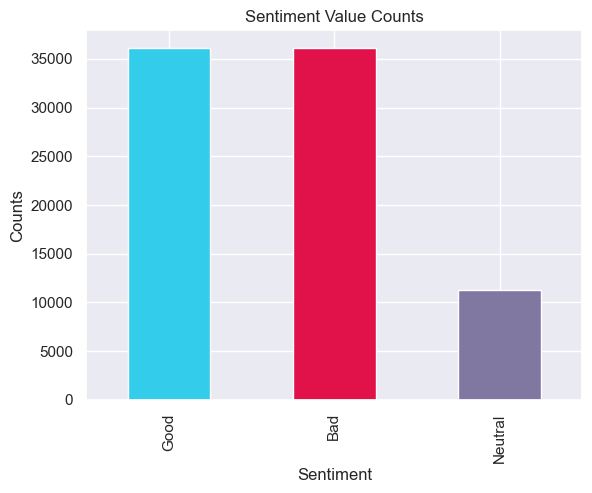

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('snaggr_file.csv', index_col=0)
df.dropna(inplace=True)
# Classifying reviews as neutral based on the data I've worked with is quite difficult for the models of this caliber.
# For optimal results, I'm changing the 'Neutral' labels to'Bad'.
# df.loc[df['sentiment'] == 'Neutral', 'sentiment'] = 'Bad'
# Get the value counts of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot a bar graph
sentiment_counts.plot(kind='bar', color=['#34cceb', '#e01249', '#8178a2'])

# Add title and labels
plt.title('Sentiment Value Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

# Show the plot
plt.show()

### The dataset contains a good balance between reviews labeled 'Good' and 'Bad', but it contains a relatively low number of 'Neutral' reviews.

## Training using Count Vectorizer

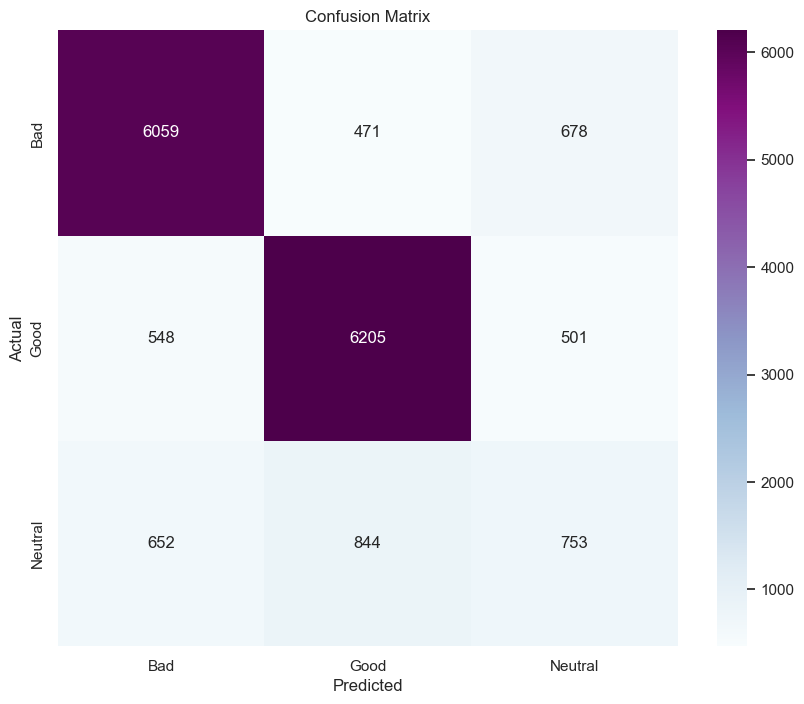

Accuracy: 0.7789479983244569
Classification Report:
               precision    recall  f1-score   support

         Bad       0.83      0.84      0.84      7208
        Good       0.83      0.86      0.84      7254
     Neutral       0.39      0.33      0.36      2249

    accuracy                           0.78     16711
   macro avg       0.68      0.68      0.68     16711
weighted avg       0.77      0.78      0.77     16711



In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#I'm going to use the mulitnomial Naive Bayes algorithm which places more weight onto words that appear multiple times in a doc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('snaggr_file.csv', index_col=0)
df.dropna(inplace=True)


# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the review texts
X = vectorizer.fit_transform(df['reviews'])

# Labels (sentiment column)
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predict the sentiments for the test data
y_pred = nb.predict(X_test)

# Evaluate the model

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good', 'Neutral'], yticklabels=['Bad', 'Good', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




### The naive bayes model is struggling to classify Neutral sentiments. 
### Its precision of 0.39 tells me that 61% of the 'Neutral' classifications were false positives and its recall of 0.39 means that it only correctly classified 39% of the 'Neutral' all observations. Overall the model performs best at classifying reviews with 'Good' sentiment, with the 'Good' class having a recall of 0.86.  
### Both the 'Good' and 'Bad' classes have a precision of 0.83 and an f1-score of 0.84, which means the model is balanced in its ability to correctly classify those classes.

###  I suspect the 'Neutral' class imbalance in the dataset to be a possible reason for the models poor performance in classifying 'Neutral' classes, as there were only around 12,000 Neutral observations in the dataset compared to around 35,000 Good and Bad observations each.

### Also, understand that by definition, the reviews that are labeled 'Neutral' are inherently going to be more ambiguous on average, as those reviews will likely contain many tokens that have a high probability of occuring in both reviews labeled as 'Good' or as 'Bad'.

## Training using TF-IDF Vectorizer

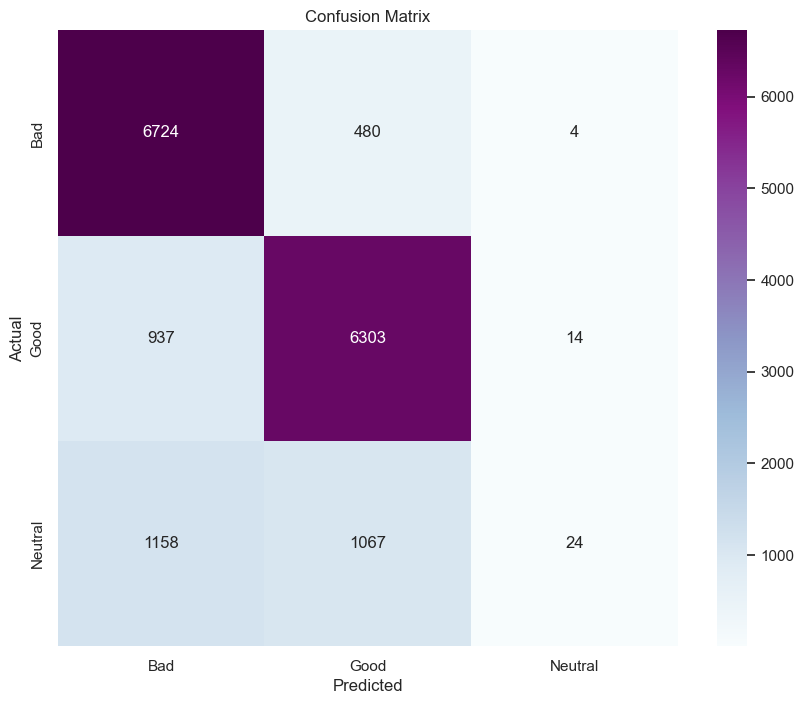

Accuracy: 0.7809825863203878
Classification Report:
               precision    recall  f1-score   support

         Bad       0.76      0.93      0.84      7208
        Good       0.80      0.87      0.83      7254
     Neutral       0.57      0.01      0.02      2249

    accuracy                           0.78     16711
   macro avg       0.71      0.60      0.56     16711
weighted avg       0.75      0.78      0.73     16711



In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#I'm going to use the mulitnomial Naive Bayes algorithm which places more weight onto words that appear multiple times in a doc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('snaggr_file.csv', index_col=0)
df.dropna(inplace=True)


# Initialize the CountVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the review texts
X = tfidf_vectorizer.fit_transform(df['reviews'])

# Labels (sentiment column)
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predict the sentiments for the test data
y_pred = nb.predict(X_test)

# Evaluate the model

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good', 'Neutral'], yticklabels=['Bad', 'Good', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




### Using TF-IDF Vectorizer over Count Vectorizer signifincantly improved the models ability to limit false positive classification of Neutral reviews, boosting its precision for the Neutral class by 18%. But its overall ability to correctly classify a Neutral review is extremelty poor at 0.01. These metrics indicate the model seems to be more biased against classifying a review as Neutral. 

### There were also notible decreases in the models ability to correctly classify Bad and Good reviews which both saw a drop in precision and recall.

## Trying oversampling with SMOTE and TF-IDF Vectorizer

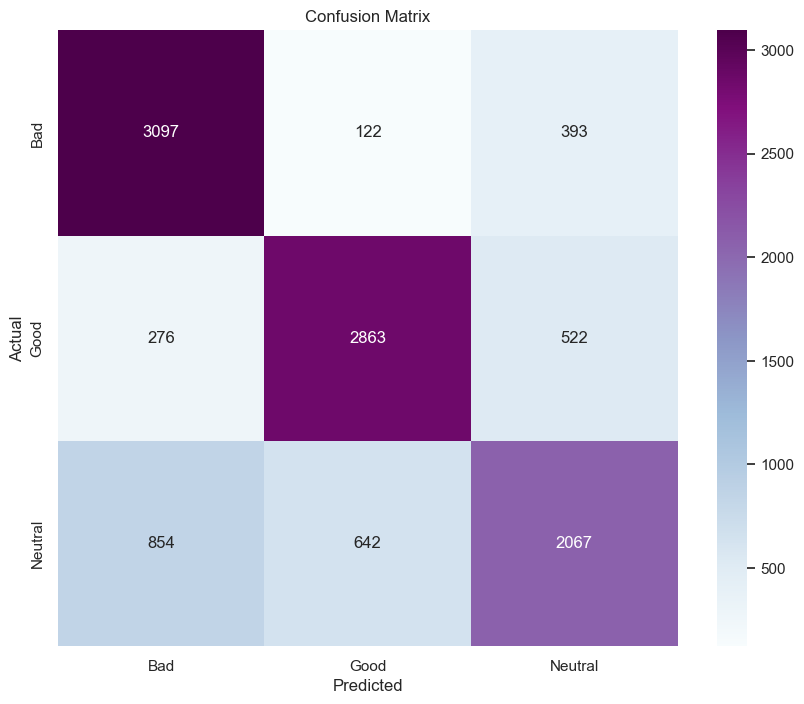

Accuracy: 0.7407715023994094
Classification Report:
               precision    recall  f1-score   support

         Bad       0.73      0.86      0.79      3612
        Good       0.79      0.78      0.79      3661
     Neutral       0.69      0.58      0.63      3563

    accuracy                           0.74     10836
   macro avg       0.74      0.74      0.74     10836
weighted avg       0.74      0.74      0.74     10836



In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load and preprocess the data
df = pd.read_csv('snaggr_file.csv', index_col=0)
df.dropna(inplace=True)

# Text Preprocessing with TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['reviews'])

# Extract the labels
y = df['sentiment']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

# Model Training
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Model Evaluation
y_pred = nb.predict(X_test)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good', 'Neutral'], yticklabels=['Bad', 'Good', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


### Oversampling using the SMOTE method significantly improved the models ability to correctly classify reviews labeled 'Neutral', boosting its precision by 36% and its recall by 25% for that class.

### This is also visually indicated by the much darker color of the grid square at coodinates ('Neutral, Neutral). 

### However, that improvement seemingly comes at the cost of losing about 4% overall accuracy, as well as a significant amount of precision and recall for both the 'Good' and 'Bad' classes. 
### The confusion matrix heat map helps to visualize and quantify how the model is confusing one class for another. The heat map tells me that the model misidentified 854 'Neutral' reviews as bad and it misidentified slightly less 'Good' reviews as 'Neutral' at 642. This implies that there are probably more shared tokens across the observations with 'Neutral' and 'Bad' labels than there are with 'Neutral' and 'Good'.  


## Let's see the results of training the naive Bayes model if we simply set the 'Neutral' sentiments as 'Bad'

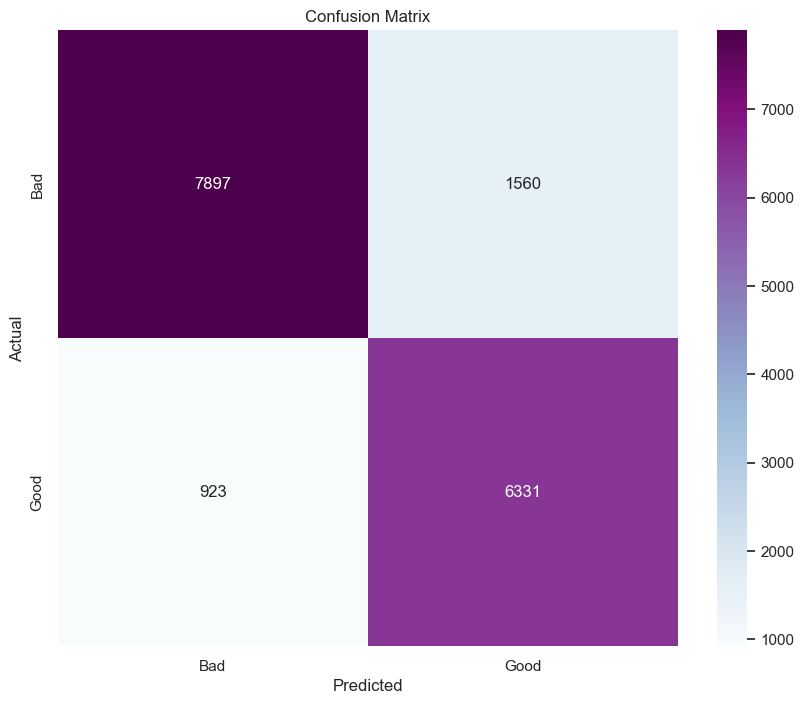

Accuracy: 0.8514152354736401
Classification Report:
               precision    recall  f1-score   support

         Bad       0.90      0.84      0.86      9457
        Good       0.80      0.87      0.84      7254

    accuracy                           0.85     16711
   macro avg       0.85      0.85      0.85     16711
weighted avg       0.85      0.85      0.85     16711



In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#I'm going to use the mulitnomial Naive Bayes algorithm which places more weight onto words that appear multiple times in a doc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('snaggr_file.csv', index_col=0)
df.dropna(inplace=True)


# Correctly replace 'Neutral' with 'Bad'
df.loc[df['sentiment'] == 'Neutral', 'sentiment'] = 'Bad'

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the review texts
X = vectorizer.fit_transform(df['reviews'])

# Labels (sentiment column)
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predict the sentiments for the test data
y_pred = nb.predict(X_test)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Replacing 'Neutral' sentiments with 'Bad' and retraining the Naive Bayes model resulted in an improvement in the model's performance. The accuracy increased to 85.14%, and the precision, recall, and F1-score for the 'Bad' class also improved. 

### The elements that are in the diagnal sequence that starts with the element in the top left of the heat map and ends with the element in the bottom right of the heat map are the true predictions made by the model. In this heat map, the squares along that diagonal are much darker than the other squares, indicating a much higher volume of true predictions than false ones.

### Although this model has a high precision for 'Bad' reviews, it still misidentified 1560 'Bad' reviews as 'Good'. That is a number that I would want to be as close to 0 as possible before deploying this model in something like a customer service chatbot application, as it would be quite unflattering to a customer if the customer expressed an overall negative sentiment to a chatbot, and the chatbot responded with something like "We are glad you enjoyed your stay". 

### I suspect that most of those 1560 false-positive 'Good' classifications were reviews that were previously labeled as 'Neutral' and actually contain an overall mixed sentiment, although they are labeled as 'Bad', leading to confusion for the model.

### This approach essentially treats 'Neutral' sentiments as negative, which may not be ideal if maintaining the distinction between 'Neutral' and 'Bad' sentiments is important for an application.

### However, If an application is particularly concerned with identifying and addressing negative or low-quality reviews, treating 'Neutral' sentiments as 'Bad' can be a reasonable approach. This way, the model will be more sensitive to negative sentiments and prioritize correctly identifying them, which aligns with the goal of being responsive to customer feedback or issues.









## Now, lets see the results of setting the 'Neutral' sentiments to 'Good'

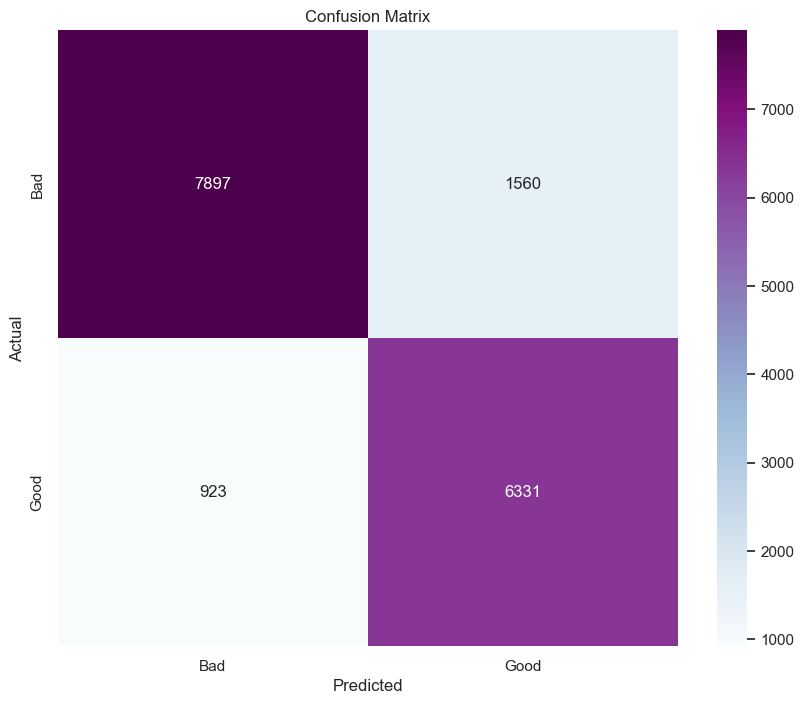

Accuracy: 0.8670336903835797
Classification Report:
               precision    recall  f1-score   support

         Bad       0.84      0.85      0.85      7208
        Good       0.89      0.88      0.88      9503

    accuracy                           0.87     16711
   macro avg       0.86      0.86      0.86     16711
weighted avg       0.87      0.87      0.87     16711



In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#I'm going to use the mulitnomial Naive Bayes algorithm which places more weight onto words that appear multiple times in a doc
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('snaggr_file.csv', index_col=0)
df.dropna(inplace=True)


# Correctly replace 'Neutral' with 'Bad'
df.loc[df['sentiment'] == 'Neutral', 'sentiment'] = 'Good'

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the review texts
X = vectorizer.fit_transform(df['reviews'])

# Labels (sentiment column)
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Predict the sentiments for the test data
y_pred = nb.predict(X_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Replacing 'Neutral' sentiments with 'Good' instead of 'Bad' and retraining the Naive Bayes model resulted in further improvement in the model's performance, albeit slightly. The accuracy was boosted by about 2%.

### For my use, I would rather my model be more  precise at identifying bad reviews. But if an application is seeking to identify positive reviews this model would work quite a bit better than the last one. This model provides a 9% boost in precision for 'Good' reviews. 


### Overall the the model isn't bad, but I would like to see if I can significantly improve it without adjusting the original labels. Perhaps more data or even a more sophisticated model such as a transformer model like BERT would yield better performance.